In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(r"C:\Users\gauri\OneDrive\Desktop\Customer Segmentation\Train (1).csv")
df_test = pd.read_csv(r"C:\Users\gauri\OneDrive\Desktop\Customer Segmentation\Test.csv")

### Exploring the dataset

In [3]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
df_train.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [6]:
df_train.Segmentation.unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [7]:
df_train.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [8]:
df_train.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [9]:
df_train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df_train.Graduated.unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df_train.Var_1.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [12]:
df_train.Ever_Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Data Preprocessing 

In [14]:
df_train = df_train.dropna()

In [15]:
df_train = df_train.drop_duplicates()

Converting categorical data to numeric data

In [16]:
df_train['Segmentation'] = df_train['Segmentation'].replace(['D', 'A', 'B', 'C'],[0,1,2,3])

In [17]:
df_train['Gender'] = df_train['Gender'].replace(['Male', 'Female'],[1,0])

In [18]:
df_train['Ever_Married'] = df_train['Ever_Married'].replace(['No', 'Yes'],[0,1])

In [19]:
df_train['Graduated'] = df_train['Graduated'].replace(['No', 'Yes'],[0,1])

In [20]:
df_train['Profession'] = df_train['Profession'].replace(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],[1,2,3,4,5,6,7,8,9])

In [21]:
df_train['Spending_Score'] = df_train['Spending_Score'].replace(['Low', 'High', 'Average'],[1,2,3])

In [22]:
df_train['Var_1'] = df_train['Var_1'].replace(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],[4,6,7,3,1,2,5])

In [23]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,1,1.0,1,4.0,4,0
2,466315,0,1,67,1,2,1.0,1,1.0,6,2
3,461735,1,1,67,1,3,0.0,2,2.0,6,2
5,461319,1,1,56,0,4,0.0,3,2.0,6,3
6,460156,1,0,32,1,1,1.0,1,3.0,6,3


In [24]:
df_train.describe()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,6665.00000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000
mean,463519.84096,0.551688,0.591748,43.536084,0.637509,4.289722,2.629107,1.649362,2.841110,5.178395,1.488372
std,2566.43174,0.497358,0.491547,16.524054,0.480755,2.352732,3.405365,0.852364,1.524743,1.409265,1.137286
min,458982.00000,0.000000,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,461349.00000,0.000000,0.000000,31.000000,0.000000,3.000000,0.000000,1.000000,2.000000,4.000000,0.000000
50%,463575.00000,1.000000,1.000000,41.000000,1.000000,4.000000,1.000000,1.000000,2.000000,6.000000,1.000000
75%,465741.00000,1.000000,1.000000,53.000000,1.000000,6.000000,4.000000,2.000000,4.000000,6.000000,3.000000
max,467974.00000,1.000000,1.000000,89.000000,1.000000,9.000000,14.000000,3.000000,9.000000,7.000000,3.000000


### Correlation matrix

<Axes: >

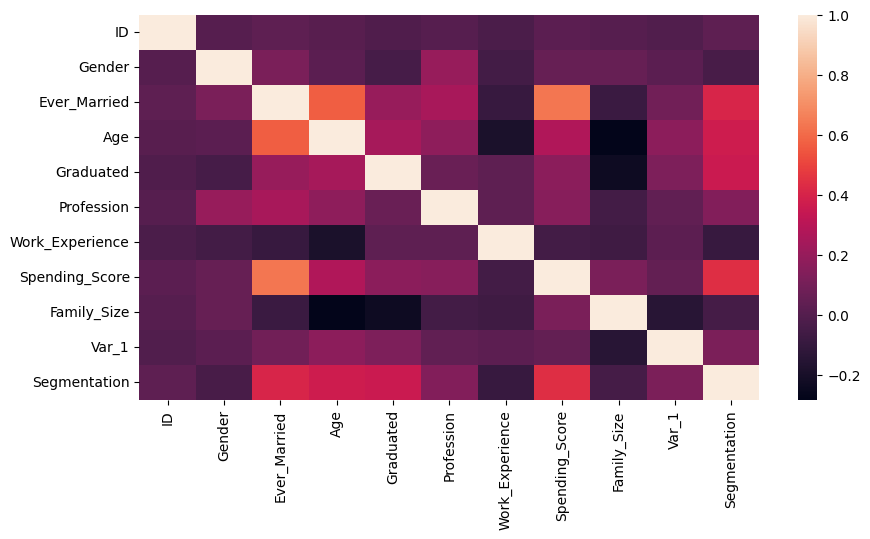

In [25]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_train.corr())

In [26]:
df_train.corr()['Segmentation']

ID                 0.031795
Gender            -0.037604
Ever_Married       0.408512
Age                0.364974
Graduated          0.358138
Profession         0.143062
Work_Experience   -0.093330
Spending_Score     0.436276
Family_Size       -0.046540
Var_1              0.118844
Segmentation       1.000000
Name: Segmentation, dtype: float64

In [27]:
df_train.Segmentation.value_counts()

Segmentation
0    1757
3    1720
1    1616
2    1572
Name: count, dtype: int64

The dataset is balanced.

In [28]:
X = df_train.drop(['ID','Segmentation'],axis='columns')

In [29]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,1,1.0,1,4.0,4
2,0,1,67,1,2,1.0,1,1.0,6
3,1,1,67,1,3,0.0,2,2.0,6
5,1,1,56,0,4,0.0,3,2.0,6
6,1,0,32,1,1,1.0,1,3.0,6
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,4,0.0,2,5.0,6
8064,1,0,35,0,9,3.0,1,4.0,4
8065,0,0,33,1,1,1.0,1,1.0,6
8066,0,0,27,1,1,1.0,1,4.0,6


In [30]:
y = df_train['Segmentation']

In [31]:
y

0       0
2       2
3       2
5       3
6       3
       ..
8062    2
8064    0
8065    0
8066    2
8067    2
Name: Segmentation, Length: 6665, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X,y)

In [33]:
X

array([[1.        , 0.        , 0.05633803, ..., 0.        , 0.375     ,
        0.5       ],
       [0.        , 1.        , 0.69014085, ..., 0.        , 0.        ,
        0.83333333],
       [1.        , 1.        , 0.69014085, ..., 0.5       , 0.125     ,
        0.83333333],
       ...,
       [0.        , 0.        , 0.21126761, ..., 0.        , 0.        ,
        0.83333333],
       [0.        , 0.        , 0.12676056, ..., 0.        , 0.375     ,
        0.83333333],
       [1.        , 1.        , 0.26760563, ..., 1.        , 0.25      ,
        0.5       ]])

### Models

Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy','log_loss'],'random_state':(1,32,50,46),'warm_start':(True,False),'min_impurity_decrease':[1.0,2.0]
          ,'n_estimators':[100,150,200]}
clf = GridSearchCV(rfc,params)
clf.fit(X,y)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_impurity_decrease': [1.0, 2.0],
                         'n_estimators': [100, 150, 200],
                         'random_state': (1, 32, 50, 46),
                         'warm_start': (True, False)})

In [37]:
print(clf.best_params_)

{'criterion': 'gini', 'min_impurity_decrease': 1.0, 'n_estimators': 100, 'random_state': 1, 'warm_start': True}


In [38]:
rfc = RandomForestClassifier(criterion='entropy',n_estimators=500,random_state=1,warm_start=False)

In [39]:
rfc.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

In [40]:
from sklearn.model_selection import cross_validate
cross_validate(rfc,X,y,cv=4)

{'fit_time': array([24.93550086, 12.77633739, 12.5665381 , 10.16754127]),
 'score_time': array([0.42370558, 0.42246008, 0.44688177, 0.52522826]),
 'test_score': array([0.4835033 , 0.4759904 , 0.50180072, 0.49039616])}

Random Forest Model yielded a mean accuracy of approx 49%.

XGBoost 

In [41]:
from xgboost import XGBClassifier

In [42]:
y.unique()

array([0, 2, 3, 1], dtype=int64)

In [43]:
xgb = XGBClassifier(learning_rate=0.1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
xgb.fit(X,y)
print(xgb.score(X,y))

0.9537884471117779


### Test Dataset

In [44]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [46]:
df_test['Gender'] = df_test['Gender'].replace(['Male', 'Female'],[1,0])

df_test['Ever_Married'] = df_test['Ever_Married'].replace(['No', 'Yes'],[0,1])

df_test['Graduated'] = df_test['Graduated'].replace(['No', 'Yes'],[0,1])

df_test['Profession'] = df_test['Profession'].replace(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],[1,2,3,4,5,6,7,8,9])

df_test['Spending_Score'] = df_test['Spending_Score'].replace(['Low', 'High', 'Average'],[1,2,3])

df_test['Var_1'] = df_test['Var_1'].replace(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],[4,6,7,3,1,2,5])

In [47]:
for i in df_test.columns:
  if sum(df_test[i].isna())!=0:
    if i!=["Age","Work_Experience","Family_Size"]:
      df_test[i]=df_test[i].fillna(df_test[i].mode().values[0])
    else:
      df_test[i]=df_test[i].fillna(df_test[i].mean())

In [48]:
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1.0,36,1.0,2.0,0.0,1,1.0,6.0
1,458994,1,1.0,37,1.0,1.0,8.0,3,4.0,6.0
2,458996,0,1.0,69,0.0,4.0,0.0,1,1.0,6.0
3,459000,1,1.0,59,0.0,9.0,11.0,2,2.0,6.0
4,459001,0,0.0,19,0.0,8.0,1.0,1,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0.0,29,0.0,1.0,9.0,1,4.0,6.0
2623,467958,0,0.0,35,1.0,5.0,1.0,1,1.0,6.0
2624,467960,0,0.0,53,1.0,7.0,1.0,1,2.0,6.0
2625,467961,1,1.0,47,1.0,9.0,1.0,2,5.0,4.0


In [49]:
Xtest = df_test.drop(['ID'],axis='columns')

In [50]:
preds = xgb.predict(Xtest)
preds

array([3, 3, 1, ..., 1, 3, 1], dtype=int64)

In [51]:
output = pd.DataFrame({"ID":df_test['ID'],"Segment":preds})
output.to_csv("submissions.csv",index=False)